<a href="https://colab.research.google.com/github/Aadi-stack/Image_classificationUsingCNN/blob/main/cats_v_dogs_classification%20using%20a%20data%20augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator


In [16]:
batch_size=32
train_datagene=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagene=ImageDataGenerator(rescale=1./255)
test_datagene

In [17]:
# generators
train_generate = train_datagene.flow_from_directory(
    directory = '/content/train',
    batch_size=32,
    target_size=(256,256),
    class_mode='binary'
)

valid_generate = train_datagene.flow_from_directory(
    directory = '/content/test',
    batch_size=32,
    target_size=(256,256),
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [18]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=batch_size,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=batch_size,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [19]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

#  To reduce overfitting


# Data Augmentation

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history1 = model.fit_generator(train_generate,steps_per_epoch=2000 // batch_size,
                    epochs=10,
                    validation_data=valid_generate,
                    validation_steps=500 // batch_size)

<ipython-input-22-0a486cac91c0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(train_generate,steps_per_epoch=2000 // batch_size,


Epoch 1/10
62/62 [==============================] - 60s 717ms/step - loss: 5.5233 - accuracy: 0.5590 - val_loss: 10.6094 - val_accuracy: 0.5063
Epoch 2/10
62/62 [==============================] - 44s 707ms/step - loss: 3.1422 - accuracy: 0.5675 - val_loss: 2.5519 - val_accuracy: 0.5333
Epoch 3/10
62/62 [==============================] - 43s 697ms/step - loss: 2.1440 - accuracy: 0.5645 - val_loss: 4.2085 - val_accuracy: 0.5146
Epoch 4/10
62/62 [==============================] - 41s 661ms/step - loss: 1.3364 - accuracy: 0.5625 - val_loss: 1.7076 - val_accuracy: 0.5271
Epoch 5/10
62/62 [==============================] - 43s 700ms/step - loss: 0.9751 - accuracy: 0.5973 - val_loss: 1.5240 - val_accuracy: 0.5063
Epoch 6/10
62/62 [==============================] - 43s 700ms/step - loss: 0.8860 - accuracy: 0.5590 - val_loss: 2.3475 - val_accuracy: 0.5167
Epoch 7/10
62/62 [==============================] - 43s 700ms/step - loss: 0.7899 - accuracy: 0.5786 - val_loss: 0.8269 - val_accuracy: 0.614

In [24]:
import cv2

In [25]:
test_img = cv2.imread('/content/dog.jpg')

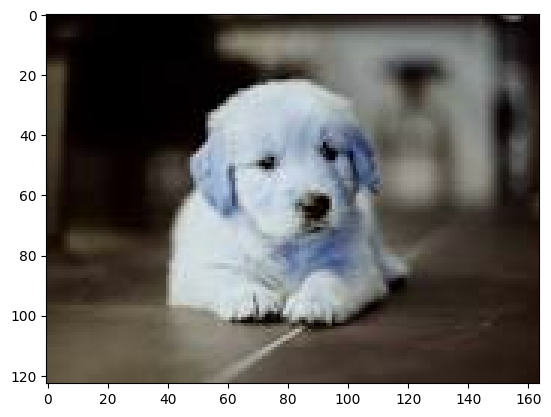

In [26]:
plt.imshow(test_img)

In [27]:
test_img.shape

(123, 164, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_img.shape

(256, 256, 3)

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 377ms/step


array([[1.]], dtype=float32)

In [35]:
import numpy as np

In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

#t=cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (256,256))


input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,256,256,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg
1/1 [==============================] - 0s 157ms/step
[[0.3506709]]
0
The image represents a Cat
